# Critical lines, Caustics and Light Curves of N point mass lenses system at the same redshift

## The basic ideas to get the:
 - Caustics: by Inverse Ray Shooting
 - Critical lines: by derive the Jacobian Matrix from the lens equation, then compute the magnification using the determine of the Jacobian Matrix
 - Light Curve: Using the result from Invers Ray Shooting

In [1]:
#import related packages and settings
import sys, time
sys.path.append("../")
from n_pointM_lens_inverse_ray_shoot import *
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# savebasedir = "../temp/"

In [17]:
# Set mass ratios, positions, angle range, output image size
xylim = 4.5 # light ray range
Nrows = 3 # number of point masses per raw
posscale = 1 # position of point masses
imgsz = 2048 # image size in pixel
num = 10000 # ray num
method = "slow"# fast(memory comsumming) and slow (save memory)

In [18]:
stupstr = "{}pms_{}X_{}rays".format(Nrows,posscale,num)
xlim, ylim = (-xylim,xylim), (-xylim,xylim)
masses = []
xs = []
ys = []
# generate latice of point masses
minx = abs(Nrows//2)
for i in range(Nrows):
        masses += [(-1)**(i+k) for k in range(Nrows)]
        # masses += [(1)**(i+k) for k in range(Nrows)] # all positive
        xs += [k for k in range(-minx,Nrows-minx)] #
        ys += [i-minx for k in range(Nrows)]
masses = np.array(masses)
masses = masses/np.sum(masses)
xs = np.array(xs)*posscale
ys = np.array(ys)*posscale
ImgSize = (imgsz,imgsz) # raw, colume
datatype = np.float64

In [20]:
# generate light rays in the image plane and creat the two lens system and run the inverse ray shooting code
twolens = Nlenses(masses, xs, ys)
if method == "fast":
    thetax, thetay = genxy(xlim=xlim,ylim=ylim,num=num, datatype = datatype)
    twolens.inverse_ray_shooting(thetax, thetay)
    twolens.comp_mag_samez(thetax, thetay)
    t0 = time.time()
    srcplaneIMG, imgplaneIMG = twolens.img_mapping_inone(thetax, thetay,twolens.betax, twolens.betay, xlim, ylim, ImgSize,valarr1 = twolens.mag, valarr2 = np.ones([len(thetax),]), datatype=datatype)
    t1 = time.time()
elif method == "slow":
    t0 = time.time()
    # srcplaneIMG, imgplaneIMG = twolens.get_imgs_lessmem(ImgSize, xlim, ylim, num, datatype = np.float64)
    srcplaneIMG, imgplaneIMG = twolens.get_imgs_lessmem_v2(ImgSize, xlim, ylim, num, datatype = np.float64)
    t1 = time.time()
# # mid fast method   
else:
    thetax, thetay = genxy(xlim=xlim,ylim=ylim,num=num, datatype = datatype)
    twolens.inverse_ray_shooting(thetax, thetay)
    twolens.comp_mag_samez(thetax, thetay)
    t0 = time.time()
    srcplaneIMG = twolens.img_mapping(twolens.betax, twolens.betay, xlim, ylim, ImgSize, valarr = twolens.mag) #valarr = np.ones([len(twolens.betax),])
    srcplaneIMG_withoutlens = twolens.img_mapping(thetax, thetay, xlim, ylim, ImgSize, valarr = np.ones([len(thetax),]))
    srcplaneIMG /= srcplaneIMG_withoutlens
    imgplaneIMG = twolens.img_mapping(thetax, thetay, xlim, ylim, ImgSize, valarr = twolens.mag)
    t1 = time.time()
print("time spent on inverse ray shooting: {}".format(t1-t0))

  4%|▍         | 385/10000 [00:14<06:11, 25.90it/s]


KeyboardInterrupt: 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


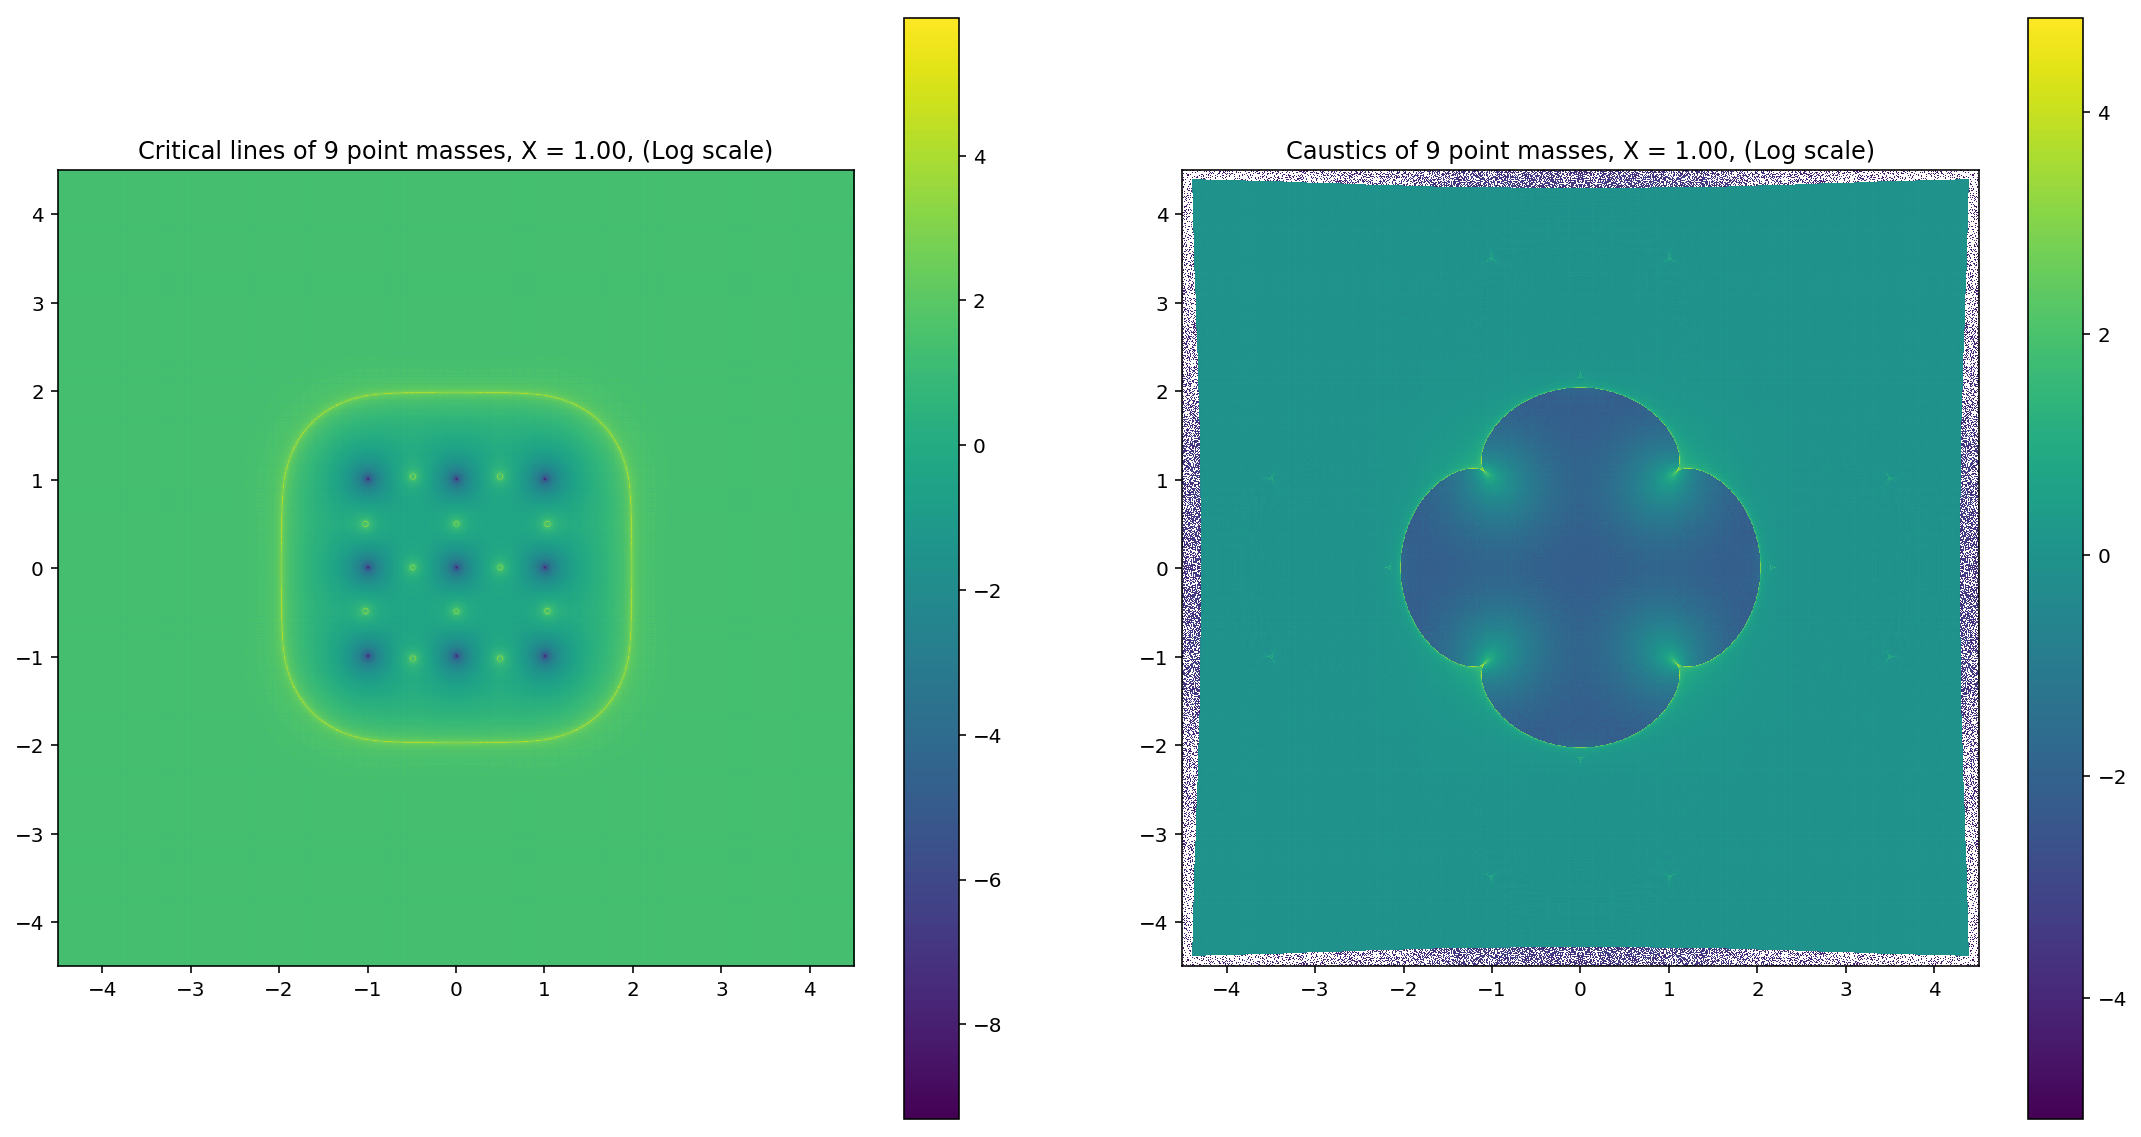

In [21]:
# plot critical lines and caustics
fig = plt.figure()
plt.subplot(122)
cmap = plt.cm.get_cmap('viridis') # 'Paired', viridis, gist_ncar, 
plt.imshow(np.log10(srcplaneIMG), origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
plt.colorbar()
title = "Caustics of {} point masses, X = {:.2f}, (Log scale)".format(len(masses),posscale)
plt.title(title)

plt.subplot(121)
cmap = plt.cm.get_cmap('viridis')
plt.imshow(np.log10(imgplaneIMG), origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
plt.colorbar()
title = "Critical lines of {} point masses, X = {:.2f}, (Log scale)".format(len(masses),posscale)
plt.title(title)

fig.set_size_inches(16,9)
plt.subplots_adjust(left=0.04, top = 0.9, bottom = 0.05, right=0.96, hspace = 0.13, wspace = 0.13)
plt.margins(0,0)
timestr=time.ctime().replace(" ","")[3:-4]
caustics_filename = "../resimgs/foranndy/Caustics_{}_{}.png".format(timestr, stupstr)

In [22]:
# generate light curve
radius, npoints = 5, 40 # radius in pixel
k = 0.5
kscale = 0.6 # source position for generate light curve
# B = np.linspace( -1, 1 , 5)*kscale
B = np.linspace( -minx, Nrows-minx , 5)*kscale
KB = [(k,b) for b in B]
cname = ["r","g","y","k","c","m","w"]
COLLOR = cname[:len(KB)]
Y, LC = {}, {}
scale = 0.9
x = np.linspace(xlim[0]*scale, xlim[1]*scale, int(ImgSize[1]*scale/2))#, endpoint=False
for kb in KB:
    k,b = kb[0], kb[1]
    Y[kb] = k*x + b
    LC[kb] = twolens.com_lightcurve(srcplaneIMG, x, Y[kb], xlim, ylim, radius, npoints)

Generating lightcurve
Generating lightcurve
Generating lightcurve
Generating lightcurve
Generating lightcurve


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


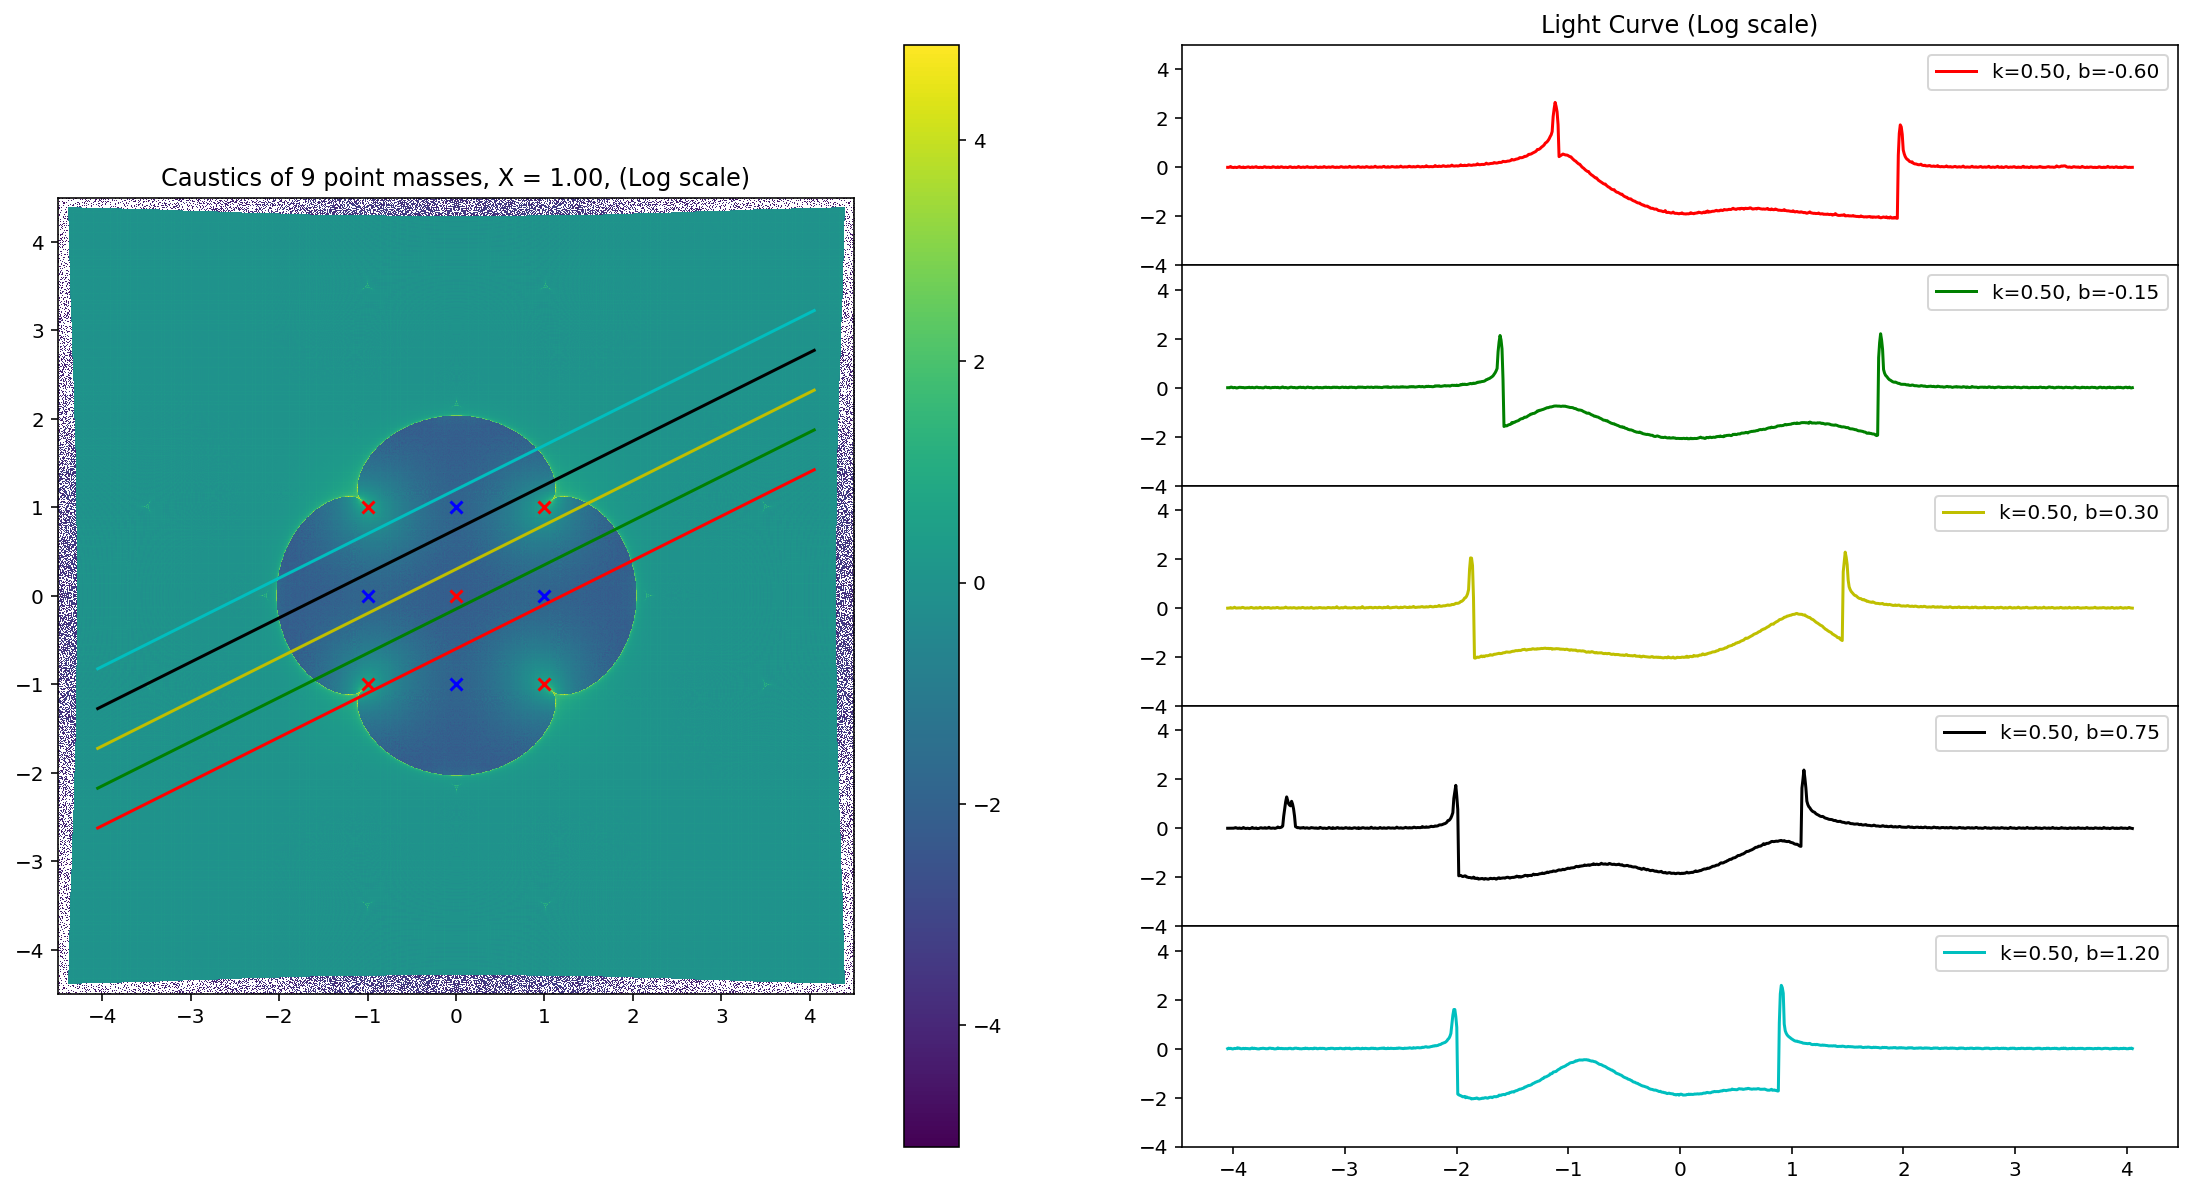

In [23]:
fig = plt.figure()
fig.set_size_inches(16,9)
plt.subplots_adjust(left=0.04, top = 0.9, bottom = 0.05, right=0.96, hspace = 0.13, wspace = 0.13)
plt.margins(0,0)
plt.subplot(121)
cmap = plt.cm.get_cmap('viridis') # 'Paired', viridis, gist_ncar, 
plt.imshow(np.log10(srcplaneIMG), origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
plt.colorbar()
title = "Caustics of {} point masses, X = {:.2f}, (Log scale)".format(len(masses),posscale)
for m, a, b in zip(masses , xs, ys):  
    if m < 0:
        c = "b"
    else:
        c = "r"
    plt.scatter(a,b,color=c,marker="x")
plt.title(title)

cnt = 0
for kb in KB:
    plt.plot(x,Y[kb],color=COLLOR[cnt])#-ylim[0]
    cnt += 1
axes = [1 for i in range(len(KB))]
cnt = 0

for kb in KB:
    axes[cnt] = plt.subplot(len(KB), 2, cnt*2+2) #int("42"+str(cnt*2+2))
    label = "k={:.2f}, b={:.2f}".format(kb[0],kb[1])
    axes[cnt].plot(x,np.log10(LC[kb]),color=COLLOR[cnt],label=label)

    axes[cnt].set_ylim([-4, 5])
    axes[cnt].legend()
    if cnt == 0:
        plt.title("Light Curve (Log scale)")
    cnt += 1
plt.subplots_adjust(hspace=.0)
lightcurve_filename = "../resimgs/foranndy/lightcurve_{}_{}.png".format(timestr, stupstr)

In [12]:
if input("save imgs or not? (y/n)>>>: ")=="y":
    fig.savefig(caustics_filename, format='png', bbox_inches='tight', dpi=600, pad_inches = 0)#, transparent=True
    fig.savefig(lightcurve_filename, format='png', bbox_inches='tight', dpi=600, pad_inches = 0)#, transparent=True

save imgs or not? (y/n)>>>: n
